# Telecom Churn

### Importing Libraries and Reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Telco.xlsx")

### Understanding the Data

In [3]:
df.head()
#reading heading of the data

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [4]:
df.info()
# Tells about no.of columns,colums labels,column data types,missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [5]:
df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

### No null values present in the data

In [6]:
df.shape
# Tells about no.of rows and no.of columns

(7043, 20)

In [7]:
df.describe()
# Tells the statistical information about the data

,Tenure Months,Monthly Charges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [8]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [9]:
df.dtypes

Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [10]:
df.dtypes.value_counts() # To check data type of data

object     18
int64       1
float64     1
dtype: int64

### Total Charges

Total Charges is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [11]:
df["Total Charges"][df["Total Charges"]== " "] = np.nan

In [12]:
df["Total Charges"].dropna(inplace=True)

In [13]:
df[df["Total Charges"]== " "]

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn


In [14]:
df['Total Charges'] = df['Total Charges'].astype(float)

## Exploratory Data Analysis

### Univariate Analysis

### Target Variable Visualization (Churn)

In [15]:
df["Churn"]

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: Churn, Length: 7043, dtype: object

Text(0.5, 1.0, 'Distribution of Churn and Non Churn Customers')

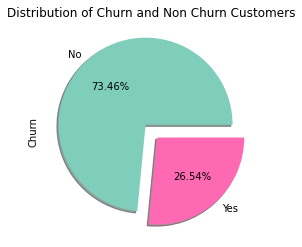

In [16]:
df["Churn"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True,colors=["#7fcdbb","#FF69B4"]) 
plt.title('Distribution of Churn and Non Churn Customers')

# Explode represents space between pieces
# autopct represents percentage value,%f represents number of deciml values 
# Shadow is for effect

#### 

### Dividing features into Numerical and Categorical :

### categorical Features

In [17]:
cf=[feature for feature in df.columns if((df[feature].dtypes=='object'))]
cf
# to get categorical features

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn']

In [18]:
cf.remove("Churn")

In [19]:
for feature in cf:
    print('the feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

the feature is Gender and number of categories are 2
the feature is Senior Citizen and number of categories are 2
the feature is Partner and number of categories are 2
the feature is Dependents and number of categories are 2
the feature is Phone Service and number of categories are 2
the feature is Multiple Lines and number of categories are 3
the feature is Internet Service and number of categories are 3
the feature is Online Security and number of categories are 3
the feature is Online Backup and number of categories are 3
the feature is Device Protection and number of categories are 3
the feature is Tech Support and number of categories are 3
the feature is Streaming TV and number of categories are 3
the feature is Streaming Movies and number of categories are 3
the feature is Contract and number of categories are 3
the feature is Paperless Billing and number of categories are 2
the feature is Payment Method and number of categories are 4


### Find categorical feature distribution w.r.t Target Variable(Churn)

#### Since we have too many categorical variables ,we divide it in 3 groups

In [20]:
l1 = ['Gender','Senior Citizen','Partner','Dependents'] # Customer Information
l2 = ['Phone Service','Multiple Lines','Internet Service','Streaming TV','Streaming Movies',
      'Online Security','Online Backup','Device Protection','Tech Support'] # Services Signed Up for!
l3 = ['Contract','Paperless Billing','Payment Method'] # Payment Information

### Group 1

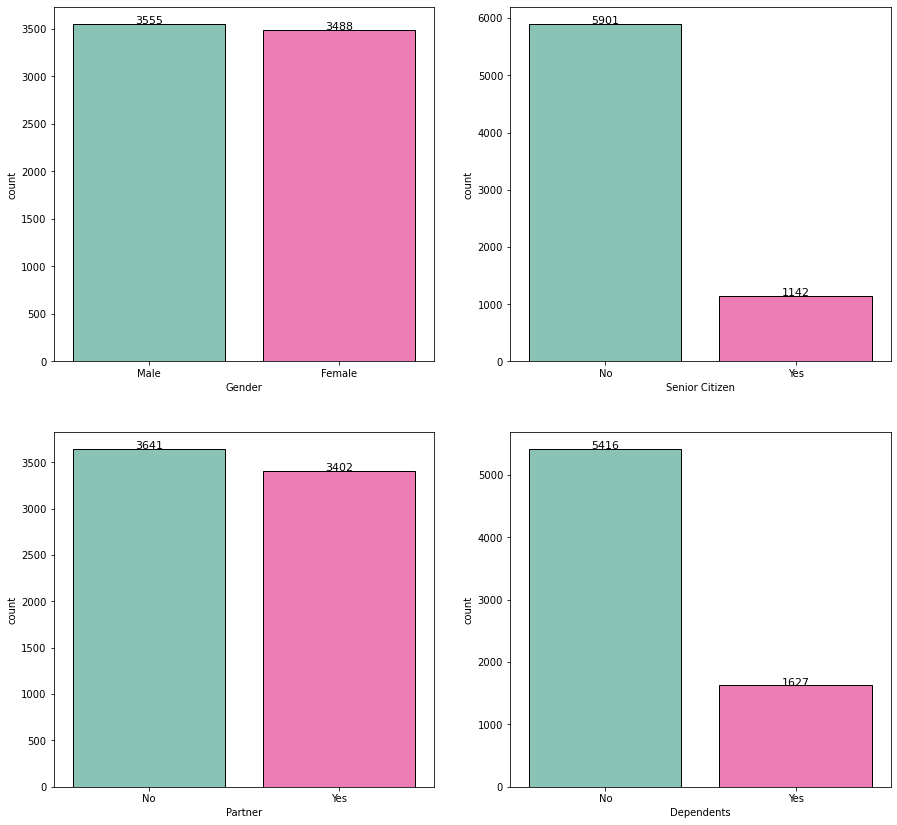

In [21]:
plt.figure(figsize=(15,30),facecolor="white")
plotnumber=1
for i in range (len(l1)):
    ax=plt.subplot(4,2,plotnumber)
    cplot=sns.countplot(l1[i],data=df,edgecolor="black",palette= ["#7fcdbb","#FF69B4","#FFFF00","#00FF00"])
    for p in cplot.patches:
        cplot.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, p.get_height(), horizontalalignment='center', fontsize = 11)
    
    plotnumber+=1
plt.show()

#### From the Graph we can see that ,the ratio of male and female Customer is almost equal

#### In this data The ratio of senior Citizen to Non Senior Citizen is 5:1, so We have Most people in this data rae less than 60 years

#### The Percentage of Customer who has Partner is 48% so this is not giving us much insight regarding churn

#### 23% People have Dependents,which means Most of the Customer are Independent ,and are earning on their own 

#### Group 2

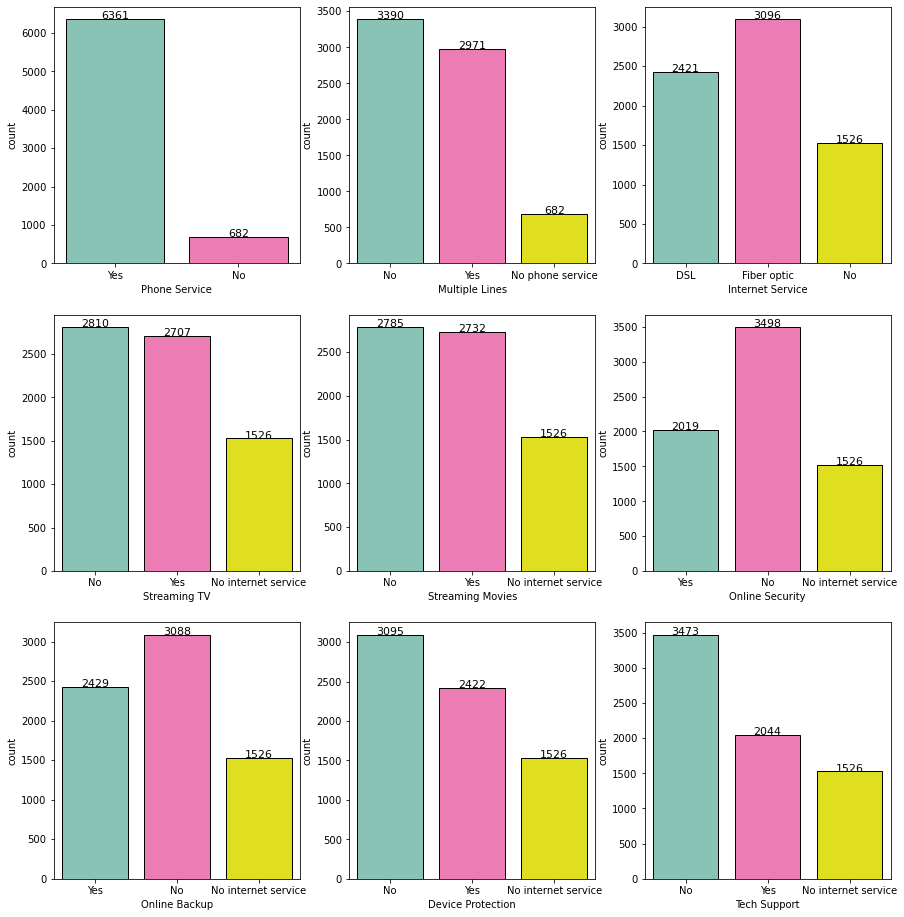

In [22]:
plt.figure(figsize=(15,50),facecolor="white")
plotnumber=1
for i in range (len(l2)):
    ax=plt.subplot(9,3,plotnumber)
    cplot=sns.countplot(l2[i],data=df,edgecolor="black",palette= ["#7fcdbb","#FF69B4","#FFFF00","#00FF00"])
    for p in cplot.patches:
        cplot.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, p.get_height(), horizontalalignment='center', fontsize = 11)
    plotnumber+=1
plt.show()

#### 90 % of people in the data use phone Service

#### The multiple Line Distribution tells us that ,most people prefer single line ,then Multiple Line 

#### 44%  Customer Prefer Fiter Optic ,internet service,maybe cheaper and Faster speed

#### 44% customer does not Opted for Device Protection,maybe customer dont have that expensive device 

#### 49% of customers dont opted for tech support 

### Group 3

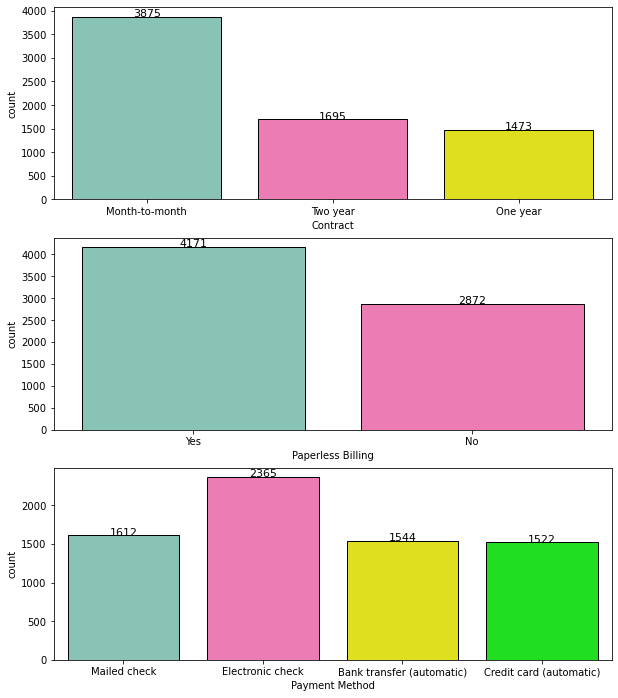

In [23]:
plt.figure(figsize=(10,12),facecolor="white")
plotnumber=1
for i in range (len(l3)):
    ax=plt.subplot(3,1,plotnumber)
    cplot=sns.countplot(l3[i],data=df,edgecolor="black",palette= ["#7fcdbb","#FF69B4","#FFFF00","#00FF00"])
    for p in cplot.patches:
        cplot.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, p.get_height(), horizontalalignment='center', fontsize = 11)
    
    plotnumber+=1
plt.show()

#### 55% of customer has a Month to Month Contract

#### Almost 60 % people prefer paperless billing

####  35 % of Customer Prefer Electronic Check and all other payment methods atre equally preffered





## Numerical Features

In [24]:
nf=[feature for feature in df.columns if((df[feature].dtypes!='object'))]
nf
# to get categorical features

['Tenure Months', 'Monthly Charges', 'Total Charges']

In [25]:
for feature in nf:
    print('the feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

the feature is Tenure Months and number of categories are 73
the feature is Monthly Charges and number of categories are 1585
the feature is Total Charges and number of categories are 6531


### Tenure Months

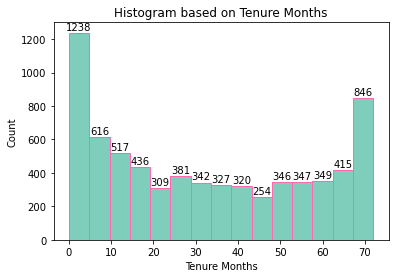

In [26]:
freq,bins,patches =plt.hist(df["Tenure Months"],bins=15,edgecolor="#FF69B4",color="#7fcdbb")
plt.xlabel("Tenure Months")
plt.ylabel("Count")
plt.title("Histogram based on Tenure Months")

bin_centers = np.diff(bins)*0.5+bins[:-1] # for getting centre of bins and bin values till last




for n,( fr, x,patch ) in enumerate(zip(freq, bin_centers,patches)):#enumerate for index of list and zip to get elements from multiple lists parallely
  height = int(freq[n]) # For calculatinhg height, int for integer
  plt.annotate("{}".format(height),# we annotate on basis of height
               xy = (x, height),  # xy is positional arguement for x and y cordinates        
               xytext = (0,1),# coordinate of text  x and y cordinates          
               textcoords = "offset points",
               ha = 'center',va = 'bottom'# allignment of text horizontal and vertical allignment 
              )





#### Tenure Month ranges lies from 0 to 70 ,maximum peak is at 0 ,which means many customer opted for trial and left immidiately 
#### After 0 we see downward trend and it again rises at 70

### Monthly Charges

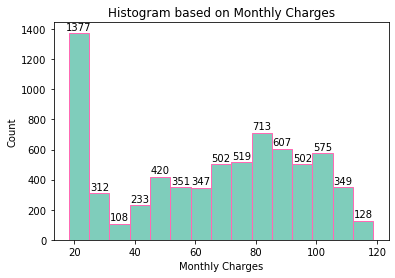

In [27]:
freq,bins,patches =plt.hist(df["Monthly Charges"],bins=15,edgecolor="#FF69B4",color="#7fcdbb")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.title("Histogram based on Monthly Charges")

bin_centers = np.diff(bins)*0.5+bins[:-1] # for getting centre of bins and bin values till last




for n,( fr, x,patch ) in enumerate(zip(freq, bin_centers,patches)):#enumerate for index of list and zip to get elements from multiple lists parallely
  height = int(freq[n]) # For calculatinhg height, int for integer
  plt.annotate("{}".format(height),# we annotate on basis of height
               xy = (x, height),  # xy is positional arguement for x and y cordinates        
               xytext = (0,1),# coordinate of text  x and y cordinates          
               textcoords = "offset points",
               ha = 'center',va = 'bottom'# allignment of text horizontal and vertical allignment 
              )





#### Data seems Right Skeewed ,Peak is at 20

### Total Charges

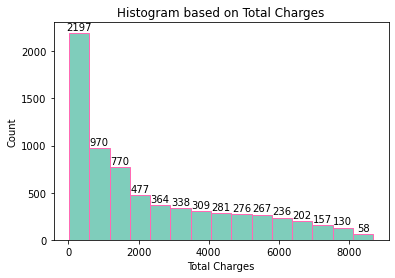

In [28]:
freq,bins,patches =plt.hist(df["Total Charges"],bins=15,edgecolor="#FF69B4",color="#7fcdbb")
plt.xlabel("Total Charges")
plt.ylabel("Count")
plt.title("Histogram based on Total Charges")

bin_centers = np.diff(bins)*0.5+bins[:-1] # for getting centre of bins and bin values till last




for n,( fr, x,patch ) in enumerate(zip(freq, bin_centers,patches)):#enumerate for index of list and zip to get elements from multiple lists parallely
  height = int(freq[n]) # For calculatinhg height, int for integer
  plt.annotate("{}".format(height),# we annotate on basis of height
               xy = (x, height),  # xy is positional arguement for x and y cordinates        
               xytext = (0,1),# coordinate of text  x and y cordinates          
               textcoords = "offset points",
               ha = 'center',va = 'bottom'# allignment of text horizontal and vertical allignment 
              )





#### Data is right Skewed ,peak is at 0

### Find Outliers In Numerical Data 

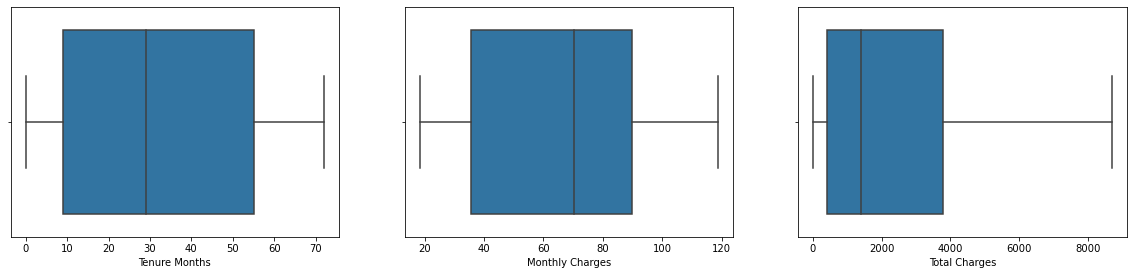

In [29]:
plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1
for numerical_feature in nf:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

#### As we can see there is no outlier present in our data

### Bivariate Analysis

### Group 1 w.r.t Churn

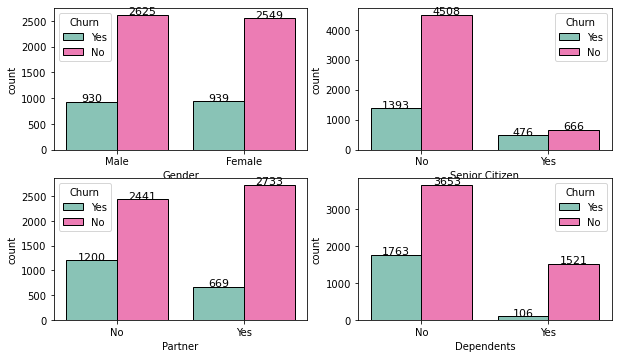

In [30]:
plt.figure(figsize=(10,12),facecolor="white")
plotnumber=1
for i in range (len(l1)):
    ax=plt.subplot(4,2,plotnumber)
    cplot=sns.countplot(l1[i],data=df,hue="Churn",edgecolor="black",palette= ["#7fcdbb","#FF69B4","#FFFF00","#00FF00"])
    for p in cplot.patches:
        cplot.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, p.get_height(), horizontalalignment='center', fontsize = 11)
    
    plotnumber+=1
plt.show()

### Group 2 w.r.t churn

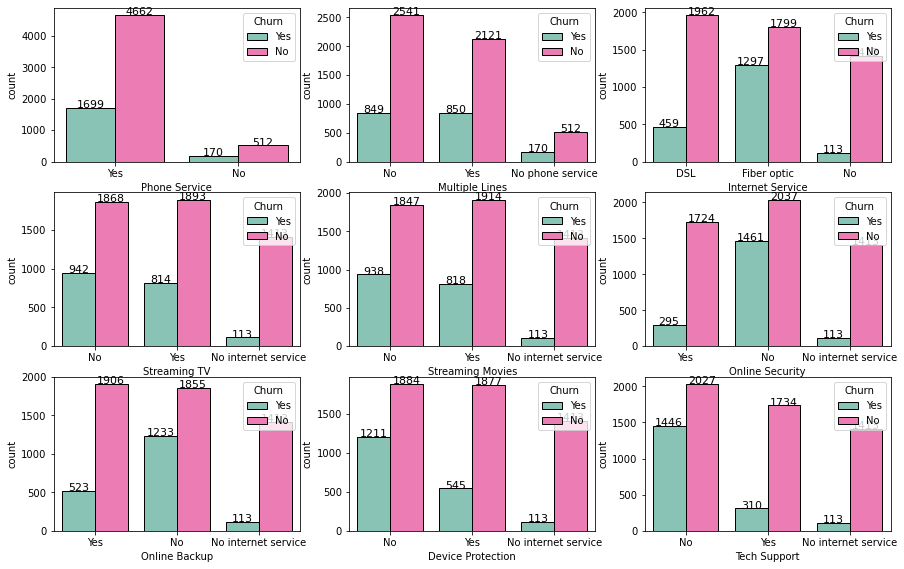

In [31]:
plt.figure(figsize=(15,30),facecolor="white")
plotnumber=1
for i in range (len(l2)):
    ax=plt.subplot(9,3,plotnumber)
    cplot=sns.countplot(l2[i],data=df,hue="Churn",edgecolor="black",palette= ["#7fcdbb","#FF69B4","#FFFF00","#00FF00"])
    for p in cplot.patches:
        cplot.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, p.get_height(), horizontalalignment='center', fontsize = 11)
    
    plotnumber+=1
plt.show()

### Group 3 w.r.t to Churn

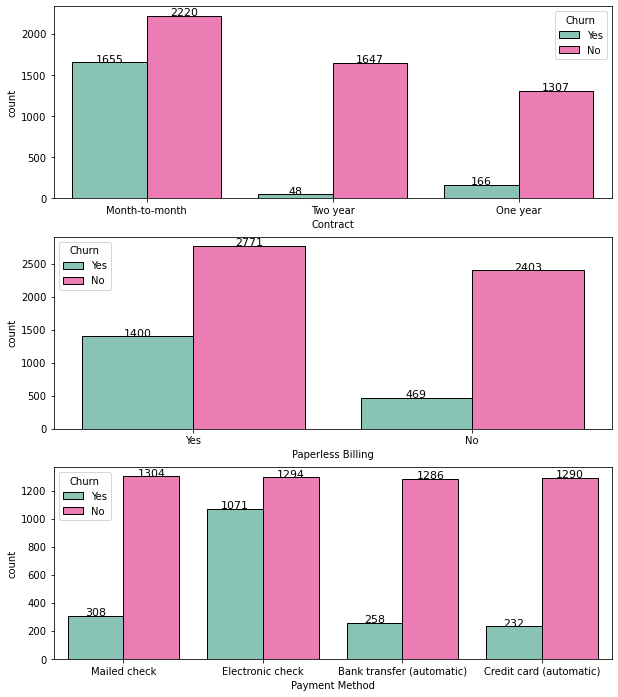

In [32]:
plt.figure(figsize=(10,12),facecolor="white")
plotnumber=1
for i in range (len(l3)):
    ax=plt.subplot(3,1,plotnumber)
    cplot=sns.countplot(l3[i],data=df,hue="Churn",edgecolor="black",palette= ["#7fcdbb","#FF69B4","#FFFF00","#00FF00"])
    for p in cplot.patches:
        cplot.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, p.get_height(), horizontalalignment='center', fontsize = 11)
    
    plotnumber+=1
plt.show()

### Numerical features vs Numerical features 

#### Tenure Months VS Total Charges

<AxesSubplot:xlabel='Tenure Months', ylabel='Total Charges'>

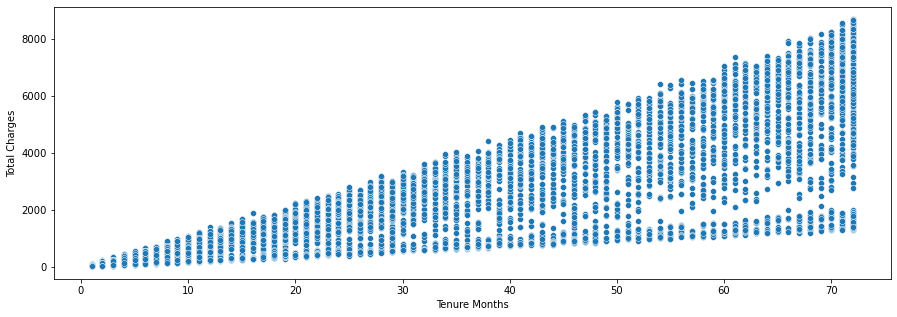

In [33]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Tenure Months",y="Total Charges",data=df,palette= ["#7fcdbb","#FF69B4"])

##### Tenure Months and Total Charges showing Upward Trend ,as Total Charges Increases Tenure Months Also Increases

#### Total Charges VS Montly Charges

<AxesSubplot:xlabel='Monthly Charges', ylabel='Total Charges'>

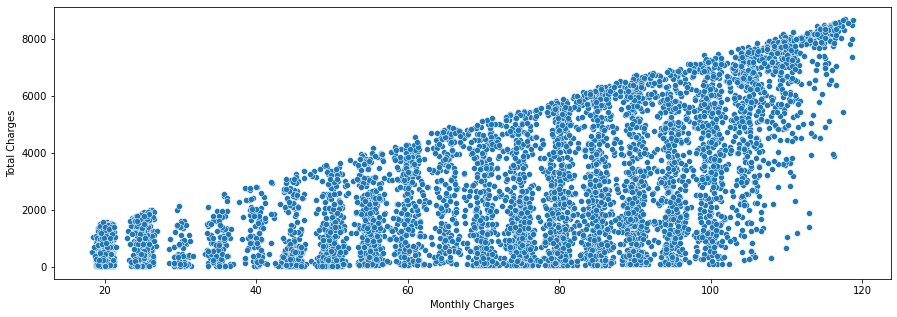

In [34]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Monthly Charges",y="Total Charges",data=df,palette= ["#7fcdbb","#FF69B4"])

##### Total Charges is propotional to monthly Charges till 100 after that some disruptions can be seen

### Multivariate Analysis

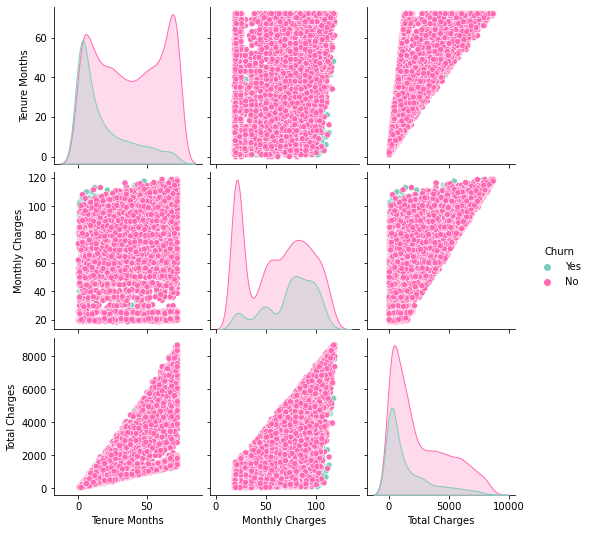

In [35]:
sns.pairplot(data=df,hue="Churn",palette= ["#7fcdbb","#FF69B4"])

# Summary of EDA



gender : Male = Female

SeniorCitizen : No SeniorCitizen > SeniorCitizen

Partner : No Partner > Partner

Dependents : No Dependent > Dependent

PhoneService : PhoneService > No PhoneService

MultipleLines : No MultipleLines >  MultipleLines > No PhoneService

InternetService : Fiber Optic > DSL > No InternetService

OnlineSecurity : Absent > Present > No InternetService

OnlineBackup : Absent > Present > No InternetService

DeviceProtection : Absent > Present > No InternetService

TechSupport : Absent > Present > No InternetService

StreamingTV : Absent > Present > No InternetService

StreamingMovies : Absent > Present > No InternetService

Contract : Month-to-Month > Two year > One year

PaperlessBilling : Present > Absent

PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)


Total Charges is propotional to Tenure Months and Monthly Charges

There are 16 Categorical  Features and 4 Numerical Features

There are No outliers present in our Data

More Customer Churn in Month to Month






### Handle Missing Values

In [36]:
df.isnull().sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn                 0
dtype: int64

<AxesSubplot:>

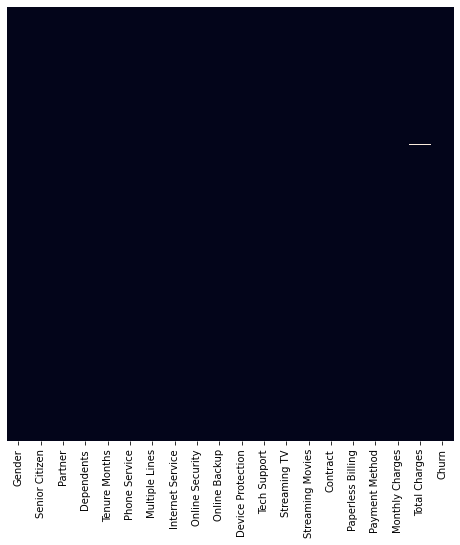

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), cbar=False,yticklabels=False)

#### We have found missing Value in Total Charges

In [38]:
df["Total Charges"].skew()

0.961642499724251

#### Since skewness is less than 1 ,we will replace it by mean

In [39]:
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].mean())


In [40]:
df["Total Charges"].isnull().sum()

0

<AxesSubplot:>

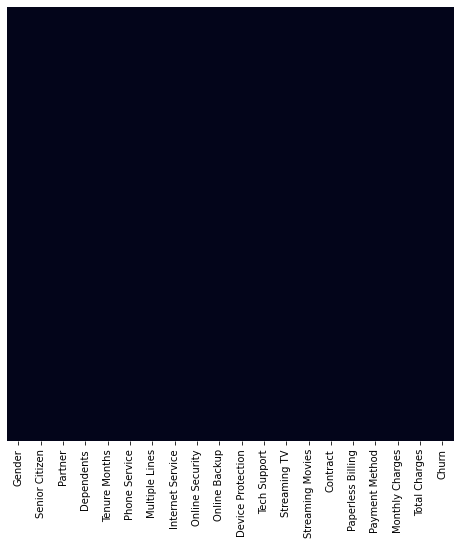

In [41]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), cbar=False,yticklabels=False)

### Feature Scaling 

##### Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model.

##### Scaling can make a difference between a weak machine learning model and a better one

### Standarisation

Standard Scaler — standardization

StandardScaler() converts the numbers into the standard form of mean = 0 and std = 1 based on z-score formula:


x’ = (x — mean) / standard deviation.

In [42]:
from sklearn.preprocessing import StandardScaler # Import Standard Scaler Library

In [43]:
Scaling=StandardScaler() # Passing the object

In [44]:
a=Scaling.fit_transform(df[["Tenure Months","Total Charges","Monthly Charges"]]) 

In [45]:
a

array([[-1.23672422, -0.96039939, -0.36266036],
       [-1.23672422, -0.94119274,  0.19736523],
       [-0.99240204, -0.64587379,  1.1595457 ],
       ...,
       [ 1.61370124,  2.24280778,  1.27753328],
       [-0.87024095, -0.85518222, -1.1686319 ],
       [ 1.36937906,  2.01391739,  1.35896134]])

In [46]:
df[["Tenure Months","Total Charges","Monthly Charges"]]=a

In [47]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,Male,No,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.960399,Yes
1,Female,No,No,Yes,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.941193,Yes
2,Female,No,No,Yes,-0.992402,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.159546,-0.645874,Yes
3,Female,No,Yes,Yes,-0.177995,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1.330711,0.336779,Yes
4,Male,No,No,Yes,0.677133,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),1.294151,1.215539,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,1.613701,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),-1.449476,-0.381440,No
7039,Male,No,Yes,Yes,-0.340876,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.665992,-0.129281,No
7040,Female,No,Yes,Yes,1.613701,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),1.277533,2.242808,No
7041,Female,No,Yes,Yes,-0.870241,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,-1.168632,-0.855182,No


## Feature Encoding

### Handling categorical Features

In [48]:
df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

### Gender

In [49]:
df["Gender"].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [50]:
g={"Male":1,"Female":2}

In [51]:
df["Gender"]=df["Gender"].map(g)

In [52]:
df["Gender"].value_counts()

1    3555
2    3488
Name: Gender, dtype: int64

### Multiple Lines

In [53]:
df["Multiple Lines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: Multiple Lines, dtype: int64

In [54]:
m={"No":1,"Yes":2,"No phone service":3}

In [55]:
df["Multiple Lines"]=df["Multiple Lines"].map(m)

In [56]:
df["Multiple Lines"].value_counts()

1    3390
2    2971
3     682
Name: Multiple Lines, dtype: int64

### Internet Service

In [57]:
df["Internet Service"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: Internet Service, dtype: int64

In [58]:
i={"Fiber optic":1,"DSL":2,"No":3}

In [59]:
df["Internet Service"]=df["Internet Service"].map(i)

In [60]:
df["Internet Service"].value_counts()

1    3096
2    2421
3    1526
Name: Internet Service, dtype: int64

### Streaming TV

In [61]:
df["Streaming TV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: Streaming TV, dtype: int64

In [62]:
s={"No":1,"Yes":2,"No internet service":3}

In [63]:
df["Streaming TV"]=df["Streaming TV"].map(s)

In [64]:
df["Streaming TV"].value_counts()

1    2810
2    2707
3    1526
Name: Streaming TV, dtype: int64

### Streaming Movies

In [65]:
df["Streaming Movies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: Streaming Movies, dtype: int64

In [66]:
sm={"No":1,"Yes":2,"No internet service":3}

In [67]:
df["Streaming Movies"]=df["Streaming Movies"].map(sm)

In [68]:
df["Streaming Movies"].value_counts()

1    2785
2    2732
3    1526
Name: Streaming Movies, dtype: int64

### Tech Support

In [69]:
df["Tech Support"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: Tech Support, dtype: int64

In [70]:
t={"No":1,"Yes":2,"No internet service":3}

In [71]:
df["Tech Support"]=df["Tech Support"].map(t)

In [72]:
df["Tech Support"].value_counts()

1    3473
2    2044
3    1526
Name: Tech Support, dtype: int64

### Online Backup

In [73]:
df["Online Backup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: Online Backup, dtype: int64

In [74]:
o={"No":1,"Yes":2,"No internet service":3}

In [75]:
df["Online Backup"]=df["Online Backup"].map(o)

In [76]:
df["Online Backup"].value_counts()

1    3088
2    2429
3    1526
Name: Online Backup, dtype: int64

### Online Security

In [77]:
df["Online Security"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: Online Security, dtype: int64

In [78]:
os={"No":1,"Yes":2,"No internet service":3}

In [79]:
df["Online Security"]=df["Online Security"].map(os)

In [80]:
df["Online Security"].value_counts()

1    3498
2    2019
3    1526
Name: Online Security, dtype: int64

### Device Protection

In [81]:
df["Device Protection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: Device Protection, dtype: int64

In [82]:
d={"No":1,"Yes":2,"No internet service":3}

In [83]:
df["Device Protection"]=df["Device Protection"].map(d)

In [84]:
df["Device Protection"].value_counts()

1    3095
2    2422
3    1526
Name: Device Protection, dtype: int64

### Contract

In [85]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [86]:
c={"Month-to-month":1,"Two year":2,"One year":3}

In [87]:
df["Contract"]=df["Contract"].map(c)

In [88]:
df["Contract"].value_counts()

1    3875
2    1695
3    1473
Name: Contract, dtype: int64

### Payment Method

In [89]:
df["Payment Method"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

In [90]:
p={"Electronic check":1,"Mailed check":2,"Bank transfer (automatic)":3,"Credit card (automatic)":4}

In [91]:
df["Payment Method"]=df["Payment Method"].map(p)

In [92]:
df["Payment Method"].value_counts()

1    2365
2    1612
3    1544
4    1522
Name: Payment Method, dtype: int64

### Partner

In [93]:
df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [94]:
pt={"No":1,"Yes":2}

In [95]:
df["Partner"]=df["Partner"].map(pt)

In [96]:
df["Partner"].value_counts()

1    3641
2    3402
Name: Partner, dtype: int64

### Dependents

In [97]:
df["Dependents"].value_counts()

No     5416
Yes    1627
Name: Dependents, dtype: int64

In [98]:
dp={"No":1,"Yes":2}

In [99]:
df["Dependents"]=df["Dependents"].map(dp)

In [100]:
df["Dependents"].value_counts()

1    5416
2    1627
Name: Dependents, dtype: int64

### Phone Service

In [101]:
df["Phone Service"].value_counts()

Yes    6361
No      682
Name: Phone Service, dtype: int64

In [102]:
ps={"No":1,"Yes":2}

In [103]:
df["Phone Service"]=df["Phone Service"].map(ps)

In [104]:
df["Phone Service"].value_counts()

2    6361
1     682
Name: Phone Service, dtype: int64

### Senior Citizen

In [105]:
df["Senior Citizen"].value_counts()

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [106]:
sc={"No":1,"Yes":2}

In [107]:
df["Senior Citizen"]=df["Senior Citizen"].map(sc)

In [108]:
df["Senior Citizen"].value_counts()

1    5901
2    1142
Name: Senior Citizen, dtype: int64

### Paperless Billing

In [109]:
df["Paperless Billing"].value_counts()

Yes    4171
No     2872
Name: Paperless Billing, dtype: int64

In [110]:
pb={"No":1,"Yes":2}

In [111]:
df["Paperless Billing"]=df["Paperless Billing"].map(pb)

In [112]:
df["Paperless Billing"].value_counts()

2    4171
1    2872
Name: Paperless Billing, dtype: int64

In [113]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,1,1,1,1,-1.236724,2,1,2,2,2,1,1,1,1,1,2,2,-0.362660,-0.960399,Yes
1,2,1,1,2,-1.236724,2,1,1,1,1,1,1,1,1,1,2,1,0.197365,-0.941193,Yes
2,2,1,1,2,-0.992402,2,2,1,1,1,2,1,2,2,1,2,1,1.159546,-0.645874,Yes
3,2,1,2,2,-0.177995,2,2,1,1,1,2,2,2,2,1,2,1,1.330711,0.336779,Yes
4,1,1,1,2,0.677133,2,2,1,1,2,2,1,2,2,1,2,3,1.294151,1.215539,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,1,1,1.613701,2,1,3,3,3,3,3,3,3,2,2,3,-1.449476,-0.381440,No
7039,1,1,2,2,-0.340876,2,2,2,2,1,2,2,2,2,3,2,2,0.665992,-0.129281,No
7040,2,1,2,2,1.613701,2,2,1,1,2,2,1,2,2,3,2,4,1.277533,2.242808,No
7041,2,1,2,2,-0.870241,1,3,2,2,1,1,1,1,1,1,2,1,-1.168632,-0.855182,No


In [114]:
df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

## Need of correlation

Correlation is defined as the linear relationship between two variables ,how one variable depends on another variable


correlation is of three types:|
    
1.Positive correlation-in this type of correlation in which two variables move in same direction,if x increases ,y also increases

2.Negative correlation-in this type of correlation in which two variable moves in opposite direction,if x increases why decreases

3.zero correlation - when there is no relationship between the 2 variables

A perfect negative correlation is represented by the value -1.0,

 0 indicates no correlation,

+1.0 indicates a perfect positive correlation.



### How to Find Correlation

In [115]:
df.corr()# this is the theoritical way to find correlation between variables

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
Gender,1.000000,0.001874,0.001808,-0.005229,-0.005106,0.006488,0.000485,-0.010380,0.003429,0.002032,-0.005092,-0.000985,-0.001156,0.000191,-0.006171,0.011754,0.005209,0.014569,-0.000048
Senior Citizen,0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,0.099883,-0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.109299,0.156530,-0.093704,0.220173,0.102395
Partner,0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,0.090981,0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.216229,-0.014877,0.133115,0.096848,0.318812
Dependents,-0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,-0.021274,0.194508,0.206544,0.184288,0.168466,0.194620,0.149031,0.139249,0.116320,-0.118963,0.105114,-0.144206,0.032128
Tenure Months,-0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,0.242279,-0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.503232,0.006152,0.340305,0.247900,0.824757
Phone Service,0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,-0.691070,-0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,-0.000955,0.016505,-0.004070,0.247398,0.112851
Multiple Lines,0.000485,0.099883,0.090981,-0.021274,0.242279,-0.691070,1.000000,-0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.040607,0.108230,0.030659,0.146153,0.251095
Internet Service,-0.010380,-0.259390,0.000132,0.194508,-0.033230,-0.093720,-0.174989,1.000000,0.764943,0.686403,0.682448,0.760985,0.617704,0.620005,0.203148,-0.378108,0.178137,-0.905491,-0.427749
Online Security,0.003429,-0.210897,0.081850,0.206544,0.145298,0.125353,-0.235021,0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.275864,-0.334003,0.213800,-0.621227,-0.153051
Online Backup,0.002032,-0.152780,0.087055,0.184288,0.178651,0.150338,-0.210372,0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.252097,-0.262402,0.182909,-0.538454,-0.084920


### Heatmap 

<AxesSubplot:>

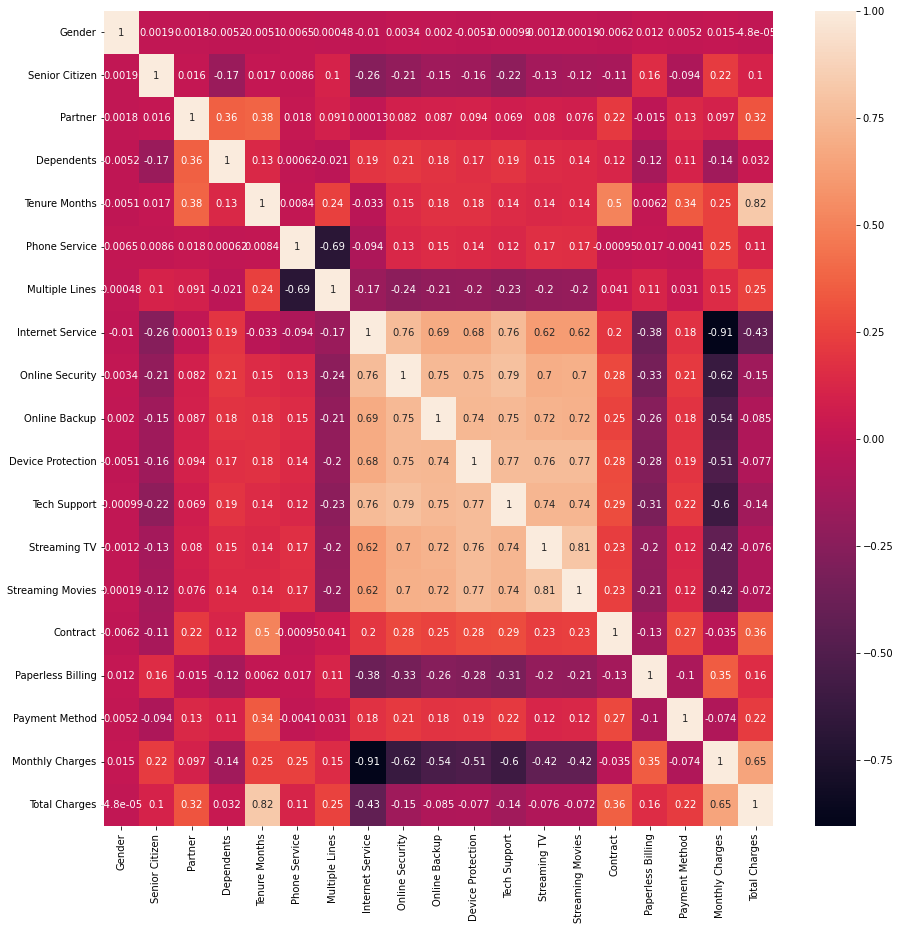

In [116]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

It is a graphical representation of data ,Help us to find the correlation between differnt varibles using color coding.


It is a graphical representation of data ,Help us to find the correlation between differnt varibles using color coding.


On Diagonal 1 represents perfect positive correlation ,which is between same variables itself

The values close to one 1 are positively correlated 

The -1 represent perfect negative correlation

In this dataset we can see:

There is no perfect negative correlation 

There is no 0 correlation



# Model Development

## Applying Different Algoriths

Since our Dependent variable is of classification  type ,we will apply classification algortiths here.

# Xgboost Classifier



In [117]:

from xgboost import XGBClassifier

In [118]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [119]:
x=df[['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges']]
y=df["Churn"]

In [120]:
y.value_counts() # to see values in y variable

No     5174
Yes    1869
Name: Churn, dtype: int64

In [121]:
x

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,1,1,1,1,-1.236724,2,1,2,2,2,1,1,1,1,1,2,2,-0.362660,-0.960399
1,2,1,1,2,-1.236724,2,1,1,1,1,1,1,1,1,1,2,1,0.197365,-0.941193
2,2,1,1,2,-0.992402,2,2,1,1,1,2,1,2,2,1,2,1,1.159546,-0.645874
3,2,1,2,2,-0.177995,2,2,1,1,1,2,2,2,2,1,2,1,1.330711,0.336779
4,1,1,1,2,0.677133,2,2,1,1,2,2,1,2,2,1,2,3,1.294151,1.215539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,1,1,1.613701,2,1,3,3,3,3,3,3,3,2,2,3,-1.449476,-0.381440
7039,1,1,2,2,-0.340876,2,2,2,2,1,2,2,2,2,3,2,2,0.665992,-0.129281
7040,2,1,2,2,1.613701,2,2,1,1,2,2,1,2,2,3,2,4,1.277533,2.242808
7041,2,1,2,2,-0.870241,1,3,2,2,1,1,1,1,1,1,2,1,-1.168632,-0.855182


In [122]:
from sklearn.model_selection import train_test_split

#### Split the data into training set and testing set using train_test_split

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) # Split the data into training set and testing set using train_test_split

#### Training the Model

In [124]:
from xgboost import XGBClassifier

In [125]:
xmodel=XGBClassifier()

In [126]:
xmodel.fit(x_train,y_train)

[12:42:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Predictions and Evaluations

In [127]:
predictions=xmodel.predict(x_test)

In [128]:
from sklearn.metrics import classification_report,confusion_matrix

In [129]:
print(confusion_matrix(y_test,predictions))

[[1367  187]
 [ 265  294]]


True Positive=1251,it means customers who has churned  and machine is predicting correctly

False Positive= 295,it means customers who has  not churned  in  but machine is showing he has churned ,also caled Type I error

False Negative=139,it means customers has actually churned in  but machine is showing he has  not churned ,also called Type II error

True Negative=1420,it means customer has not churned  and machine is also showing he has not churned.

In [130]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1554
         Yes       0.61      0.53      0.57       559

    accuracy                           0.79      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



**Accuracy =0.86-> ratio of correctly classify customer who has Churned to total no.of customers**



(TP+TN)/(TP+TN_FP_FN)

**Precision=0.86-> ratio of correcly classified customers to the total no.of customers**

(TP)/(TP+FP)

**Recall=0.86-> is the ratio of machine classified customers who has churned to actual customers who has Churned**

(TP)/(TP+FN)

**F1-Score=0.86->is the equibilirium between recall and precision**

2(precision*recall)/(precision +recall)

# Logistic Regression

Logistic Regression is used when the dependent variable(target) is categorical in nature.

#### Training the Model

In [131]:
from sklearn.linear_model import LogisticRegression 

In [132]:
lm=LogisticRegression() # lm depicts the logmodel we are using 

In [133]:
lm.fit(x_train,y_train)

LogisticRegression()

In [135]:
print('Coefficients', lm.coef_)

Coefficients [[ 0.06549261  0.15504377  0.33241387 -1.53808998 -1.48742023  0.48014198
   0.33932167 -1.11195157 -0.35144506 -0.09320284 -0.01720814 -0.42807164
   0.45257763  0.3045457  -0.34462479  0.40853953 -0.14088084 -0.46036821
   0.58189498]]


#### Predictions and Evaluations

In [136]:
predictions=lm.predict(x_test)

In [137]:
from sklearn.metrics import classification_report,confusion_matrix

In [138]:
print(confusion_matrix(y_test,predictions))

[[1383  171]
 [ 249  310]]


In [139]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1554
         Yes       0.64      0.55      0.60       559

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [141]:
lm.coef_

array([[ 0.06549261,  0.15504377,  0.33241387, -1.53808998, -1.48742023,
         0.48014198,  0.33932167, -1.11195157, -0.35144506, -0.09320284,
        -0.01720814, -0.42807164,  0.45257763,  0.3045457 , -0.34462479,
         0.40853953, -0.14088084, -0.46036821,  0.58189498]])

In [146]:
x.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges'],
      dtype='object')

In [156]:
df1 = pd.DataFrame(x.columns)
#coeffecients.columns = ['Coeffecient']
df1

,0
0,Gender
1,Senior Citizen
2,Partner
3,Dependents
4,Tenure Months
5,Phone Service
6,Multiple Lines
7,Internet Service
8,Online Security
9,Online Backup


In [161]:
df2 = pd.DataFrame(lm.coef_)
#coeffecients.columns = ['Coeffecient']
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.065493,0.155044,0.332414,-1.53809,-1.48742,0.480142,0.339322,-1.111952,-0.351445,-0.093203,-0.017208,-0.428072,0.452578,0.304546,-0.344625,0.40854,-0.140881,-0.460368,0.581895


In [166]:
df2_transposed = df2.T 

In [167]:
df2_transposed

,0
0,0.065493
1,0.155044
2,0.332414
3,-1.538090
4,-1.487420
5,0.480142
6,0.339322
7,-1.111952
8,-0.351445
9,-0.093203


In [172]:
merge = pd.concat([df1,df2_transposed], axis=1)
 

In [173]:
merge

,0,0
0,Gender,0.065493
1,Senior Citizen,0.155044
2,Partner,0.332414
3,Dependents,-1.538090
4,Tenure Months,-1.487420
5,Phone Service,0.480142
6,Multiple Lines,0.339322
7,Internet Service,-1.111952
8,Online Security,-0.351445
9,Online Backup,-0.093203


# Decison Tree and Random Forest

### Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

### Training a Decision Tree Model

In [511]:
from sklearn.tree import DecisionTreeClassifier

In [512]:
dtree=DecisionTreeClassifier()  


In [513]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation

In [514]:
predictions = dtree.predict(x_test)# after training with x_train and y_train ,we predict output woth x_test,to test performence of our model

In [515]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.81      0.81      0.81      1523
         Yes       0.51      0.50      0.51       590

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [516]:
print(confusion_matrix(y_test,predictions))

[[1240  283]
 [ 293  297]]


##  Training the Random Forest model

In [517]:
from sklearn.ensemble import RandomForestClassifier

In [518]:
rfc = RandomForestClassifier()

In [519]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

### Predictions and Evaluation

In [520]:
predictions = rfc.predict(x_test)

In [521]:
from sklearn.metrics import classification_report,confusion_matrix

In [522]:
print(confusion_matrix(y_test,predictions))

[[1385  138]
 [ 293  297]]


In [523]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1523
         Yes       0.68      0.50      0.58       590

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [524]:
from joblib import dump, load
dump(rfc, open('model.joblib','wb'))

In [525]:
from joblib import dump, load
model = load(open('model.joblib','rb'))


## Support Vector Machine

In [526]:
from sklearn.svm import SVC

### Training a Support Vector Classifier

In [527]:
svm=SVC(kernel="linear",random_state=101)

In [528]:
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=101)

### Predictions and Evaluation

In [529]:
predictions = svm.predict(x_test)

In [530]:
print(confusion_matrix(y_test,predictions))

[[1375  148]
 [ 259  331]]


In [531]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1523
         Yes       0.69      0.56      0.62       590

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113



# Optimization

### Hyperparameter XGboost

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid= {"loss":["deviance","exponential"],"learning_rate":[0.1,1,100,],"criterion":["friedman_mse", "squared_error", "mse", 'mae'],"min_samples_split":[2,3,4,5]}
xboost = GridSearchCV(xmodel, param_grid, cv=5)
xboost.fit(x_train,y_train)

In [ ]:
predictions=xboost.predict(x_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
xboost.best_params_

### Hyperparameter Random Forest

In [ ]:

param_grid= {'criterion':['gini','entropy','log_loss'],'max_depth':[11,12,15,20,30,40,],"min_samples_split":[4,5,6],"max_features":['sqrt', 'log2', 'None']}
rf = GridSearchCV(rfc, param_grid, cv=5)
rf.fit(x_train,y_train)

In [ ]:
predictions=rf.predict(x_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
rf.best_params_